In [1]:
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
from principal_RBM_alpha import *
from principal_DBN_alpha import *
from principal_DNN_MNIST import *
from sklearn.preprocessing import OneHotEncoder
from utils import *

On charge la base de donnée

In [2]:
X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='t10k-images-idx3-ubyte',
                         labels_path='t10k-labels-idx1-ubyte')
#On binarise les images
X_train = np.where(X_train > 126, 1, 0)
X_test = np.where(X_test > 126, 1, 0)
#On encode les targets
oh = OneHotEncoder()
y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()

In [3]:
# Valeurs des hyper paramètres
vect_DNN = [784, 100, 50, 10] #taille du réseau DNN
n_iter_RBM = 100
n_iter_DBN = 200
lr = 0.01
batch_size = 32

Epoch 1 out of 100, loss: 0.029918568905989353
Epoch 20 out of 100, loss: 0.02917937698821092
Epoch 40 out of 100, loss: 0.029197133116770444
Epoch 60 out of 100, loss: 0.028982358364980396
Epoch 80 out of 100, loss: 0.02877831054822382
Epoch 100 out of 100, loss: 0.028315063475180213
Epoch 1 out of 100, loss: 0.03594927709233912
Epoch 20 out of 100, loss: 0.023980081589374824
Epoch 40 out of 100, loss: 0.022719933733459718
Epoch 60 out of 100, loss: 0.022355224906399594
Epoch 80 out of 100, loss: 0.021796614095880986
Epoch 100 out of 100, loss: 0.021480237704878877
Epoch 1 out of 100, loss: 0.12168261239240173
Epoch 20 out of 100, loss: 0.11573685822279693
Epoch 40 out of 100, loss: 0.11432861208870103
Epoch 60 out of 100, loss: 0.11425144325297774
Epoch 80 out of 100, loss: 0.11413986551967364
Epoch 100 out of 100, loss: 0.11427753436993873
Epoch 1 out of 200. CELoss value is 8.401626619265647
Epoch 25 out of 200. CELoss value is 0.3327490661478374
Epoch 50 out of 200. CELoss value i

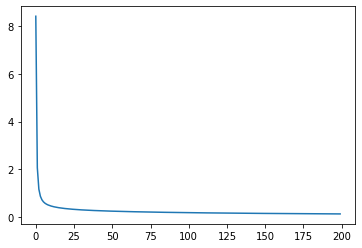

The percentage of false labeled data is  12.54


12.54

In [4]:
dnn = DNN(vect_DNN) #On initialise le DNN

dnn, losses = dnn.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM) #On entraine de manière
                                                                                        #non supervisée

dnn, loss = dnn.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr)  #On entraine ensuite de manière supervisée
plt.plot(loss)
plt.show()

dnn.test_dnn(X_test, y_test)

In [7]:
probs = dnn.get_pred(X_test[:5])
probs

array([[3.75494302e-04, 1.13644650e-07, 3.69840288e-05, 1.16274086e-03,
        1.58384670e-07, 1.17550343e-05, 2.18965547e-09, 9.98411996e-01,
        1.64057549e-07, 5.91622285e-07],
       [3.25956847e-07, 1.24099153e-02, 9.84356193e-01, 2.99286390e-03,
        9.93866204e-08, 9.32660163e-06, 4.54573637e-05, 3.14897269e-07,
        1.85503361e-04, 2.58013434e-10],
       [7.98512819e-07, 9.94354466e-01, 3.14066683e-03, 2.55555735e-04,
        5.96550739e-05, 5.27419233e-06, 9.26118320e-05, 1.43980360e-04,
        7.58568415e-04, 1.18842279e-03],
       [9.99223939e-01, 3.82604399e-09, 1.66796804e-06, 8.51890057e-05,
        1.15735477e-04, 4.17301019e-04, 2.89344509e-05, 9.66509403e-05,
        1.82003982e-07, 3.03963013e-05],
       [3.27309756e-08, 7.09818336e-04, 1.12155341e-07, 8.02414119e-05,
        9.70542284e-01, 1.30969741e-05, 2.29041207e-08, 5.60195695e-05,
        6.80158972e-05, 2.85303559e-02]])

(<matplotlib.image.AxesImage at 0x7f421d3b2310>,
 array([3.75494302e-04, 1.13644650e-07, 3.69840288e-05, 1.16274086e-03,
        1.58384670e-07, 1.17550343e-05, 2.18965547e-09, 9.98411996e-01,
        1.64057549e-07, 5.91622285e-07]))

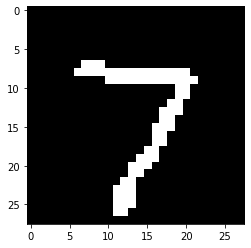

In [9]:
i=0
plt.imshow(X_test[i].reshape(28,28),cmap='gray'),probs[i]

(<matplotlib.image.AxesImage at 0x7f421d314460>,
 array([3.25956847e-07, 1.24099153e-02, 9.84356193e-01, 2.99286390e-03,
        9.93866204e-08, 9.32660163e-06, 4.54573637e-05, 3.14897269e-07,
        1.85503361e-04, 2.58013434e-10]))

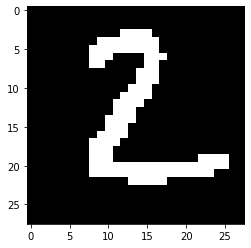

In [10]:
i=1
plt.imshow(X_test[i].reshape(28,28),cmap='gray'),probs[i]

(<matplotlib.image.AxesImage at 0x7f421d2fb040>,
 array([7.98512819e-07, 9.94354466e-01, 3.14066683e-03, 2.55555735e-04,
        5.96550739e-05, 5.27419233e-06, 9.26118320e-05, 1.43980360e-04,
        7.58568415e-04, 1.18842279e-03]))

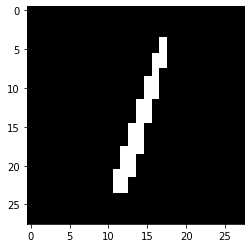

In [11]:
i=2
plt.imshow(X_test[i].reshape(28,28),cmap='gray'),probs[i]

(<matplotlib.image.AxesImage at 0x7f421d25c3d0>,
 array([9.99223939e-01, 3.82604399e-09, 1.66796804e-06, 8.51890057e-05,
        1.15735477e-04, 4.17301019e-04, 2.89344509e-05, 9.66509403e-05,
        1.82003982e-07, 3.03963013e-05]))

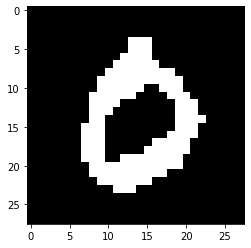

In [12]:
i=3
plt.imshow(X_test[i].reshape(28,28),cmap='gray'),probs[i]

On peut voir que le modèle prévoit la bonne classe avec une très forte probabilité. Il est interessant de remarquer que pour le 2, la probabilité du 1 est la plus proche ce qui semble cohérent car ce 2 peut ressembler à un 1.

## Analyse

In [4]:
X_train, y_train = loadlocal_mnist(images_path='train-images-idx3-ubyte',
                         labels_path='train-labels-idx1-ubyte')
X_test, y_test = loadlocal_mnist(images_path='t10k-images-idx3-ubyte',
                         labels_path='t10k-labels-idx1-ubyte')
#On binarise les images
X_train = np.where(X_train > 126, 1, 0)
X_test = np.where(X_test > 126, 1, 0)
#On encode les targets
oh = OneHotEncoder()
y_train = oh.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = oh.fit_transform(y_test.reshape(-1,1)).toarray()

In [12]:
#Figure 1
grid = [[784, 10], [784, 200, 10], [784, 200, 200, 10], [784, 200, 200, 200, 10], [784, 200, 200, 200, 200, 10]]
list_train = []
list_pretrain = []
for vect in grid:
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

[784, 10]
[784, 200, 10]
[784, 200, 200, 10]
[784, 200, 200, 200, 10]
[784, 200, 200, 200, 200, 10]


In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de couches")
plt.xlabel('Nombre de couches')
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [2, 3, 4, 5], label = 'réseau non preentrainé')
plt.plot(list_pretrain, [2, 3, 4, 5])
plt.grid()
plt.show()

In [13]:
#Figure 2
grid = [[784, 50, 50, 10], [784, 100, 100, 10],[784, 300, 300, 10], [784, 500, 500, 10], [784, 700, 700, 10]]
list_train = []
list_pretrain = []
for vect in grid:
    print(vect)
    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train, labels = y_train, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))
    print(list_train, list_pretrain)

[784, 50, 50, 10]
[784, 100, 100, 10]
[784, 300, 300, 10]
[784, 500, 500, 10]
[784, 700, 700, 10]


In [ ]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de neurones par couche")
plt.xlabel('Nombre de neurones')
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [50, 100, 300, 500, 700], label = 'réseau non preentrainé')
plt.plot(list_pretrain, [50, 100, 300, 500, 700], label = 'réseau preentrainé')
plt.legend()
plt.grid()
plt.show()

In [10]:
#Figure 3: on choisit notre initialisation classique
grid = [1000, 3000, 7000, 10000, 30000, 60000]
vect = [784, 50, 50, 10]
list_train = []
list_pretrain = []
for limit in grid:
    #On split notre base de donnée
    X_train_ex = X_train[:limit]
    y_train_ex = y_train[:limit]

    dnn1 = DNN(vect)
    dnn2 = DNN(vect) # On initialise deux réseaux identiques
    dnn1, losses = dnn1.pretrain_DBN(X_train_ex, batch_size = batch_size, n_epoch = n_iter_RBM, verbose = False) 
                                                            #On entraine de manière non supervisée
    #On entraine ensuite de manière supervisée
    dnn1, loss = dnn1.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    #On entraine celui-ci seulement de manière supervisée
    dnn2, loss = dnn2.retropropagation(data = X_train_ex, labels = y_train_ex, epochs = n_iter_DBN,
                                 batch_size = batch_size, lr_rate = lr, verbose = False)
    list_train.append(dnn2.test_dnn(X_test, y_test, verbose = False))
    list_pretrain.append(dnn1.test_dnn(X_test, y_test, verbose = False))

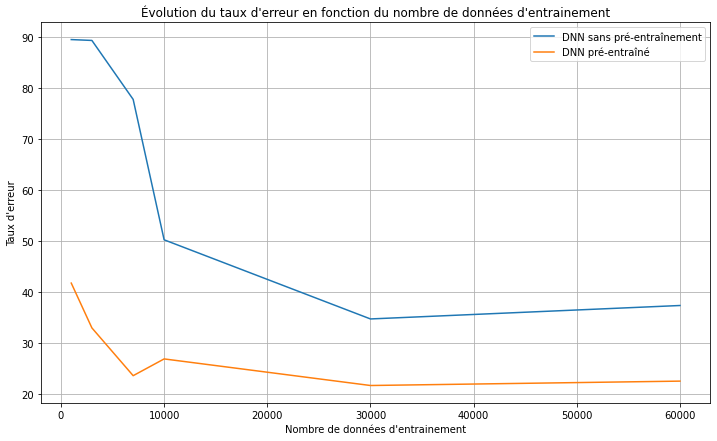

In [17]:
plt.figure(figsize=(12,7))
plt.title("Évolution du taux d'erreur en fonction du nombre de données d'entrainement")
plt.xlabel("Nombre de données d'entrainement")
plt.ylabel("Taux d'erreur")
plt.plot(list_train, [1000, 3000, 7000, 10000, 30000, 60000], label = 'réseau non preentrainé')
plt.plot(list_pretrain, [1000, 3000, 7000, 10000, 30000, 60000], label = 'réseau preentrainé')
plt.grid()
plt.legend()
plt.savefig('Test nombre données entraînement.jpg')
plt.show()